In [3]:
__author__ = 'leolmoss'
# Load network, filter by minimum values
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import networkx as nx
import random
import math



# Introduction
This notebook was created to perform the percolation of the flow network resulting from the routing of the rejection-sampling ODs. See step3.

In [22]:
# This file is the final flow network of the potential demand. Created in step3_potential_demand.ipynb
data=pd.read_csv('pairs_potential_bike_20190401.csv')
data.loc[:,'pairs']=data.apply(lambda row: (row['source'],row['target']),axis=1)
# this file is the existed bikepaths in bogota. This is easily extracted using OSMNX, see osm_bikpaths.ipynb
osm_bikepaths=pd.read_csv('osm_bikepaths.csv')
osm_bikepaths.loc[:,'pairs']=osm_bikepaths.apply(lambda row: (row['u'],row['v']),axis=1)
data.head()
#osm_bikepaths.head()

,source,target,weight,pairs
0,262391492,5728971089,1,"(262391492, 5728971089)"
1,2272948048,2272948045,1,"(2272948048, 2272948045)"
2,2272948048,2272948047,1,"(2272948048, 2272948047)"
3,494927893,494927791,149,"(494927893, 494927791)"
4,5098176538,5098176539,316,"(5098176538, 5098176539)"


In [23]:
data1=data[data['weight']>5000]
data1

,source,target,weight,pairs
326,891289834,891289849,5413,"(891289834, 891289849)"
358,891289849,5102220848,5293,"(891289849, 5102220848)"
19029,3236651041,6326367724,5632,"(3236651041, 6326367724)"
19049,3236651042,4898353696,5447,"(3236651042, 4898353696)"
41241,6313510427,3236651042,5632,"(6313510427, 3236651042)"
216573,3236651037,3236651038,5154,"(3236651037, 3236651038)"
216574,3236651037,3236651036,5029,"(3236651037, 3236651036)"
216576,3236651038,3236651039,5154,"(3236651038, 3236651039)"
216577,3236651038,3236651037,5057,"(3236651038, 3236651037)"
216579,3236651039,3236651040,5156,"(3236651039, 3236651040)"


# Join Potential flow and osm-bikepaths networks
Bogota has one of the largest bike-path networks in the world. Thus, the idea of this step is to include the existed infrastructure in the percolated network. For cities without an existed infrastructure, one should perform the percolation only in the resulting flow network for the potential demand.

In [24]:
merge=pd.merge(data,osm_bikepaths,left_on='pairs',right_on='pairs',how='outer')
merge1=pd.merge(data1,osm_bikepaths,left_on='pairs',right_on='pairs',how='outer')

In [4]:
#merge1
#len(osm_bikepaths)

In [26]:
len(data)

495908

In [27]:
merge = merge[~pd.isnull(merge['source'])]

In [28]:
len(merge)

495908

In [29]:
#merge['weight2'] = [5000 if math.isnan(merge['u']) else merge['weight']]
merge['u'].fillna(0,inplace=True)
merge['v'].fillna(0,inplace=True)
merge.loc[merge['u']!=0, 'weight'] = 5000

In [30]:
merge[['source','target','weight']].to_csv('potentialdemand_V17_mod_OSM_bikepaths.csv', index=False)

In [31]:
## this file is the network + properties, third column is speed ratio, fourth column is density
s,t,w = np.loadtxt('potentialdemand_V17_mod_OSM_bikepaths.csv',delimiter=',', unpack=True,skiprows=1)


In [32]:
G=nx.Graph()
#v17 495909-> # of OSM nodes in the flow network
for i in range(0,495908):
     if w[i]>1:
        if G.has_edge(int(s[i]),int (t[i])):
            e=G[int(s[i])][int(t[i])]["weight"]
            id=G[int(s[i])][int(t[i])]["width"]
            G.add_edge(int(s[i]),int (t[i]),weight=(w[i]+e),width=id)
        
        else:
            G.add_edge(int(s[i]),int (t[i]),weight=w[i], width=i)

Gc = max(nx.connected_component_subgraphs(G), key=len)

graphs2 =list(sorted(nx.connected_component_subgraphs(G),key=len, reverse=True))
G.size()
#w.max()
#graphs2[2].size()

85072

In [33]:
#G.edges()

# Percolation 

[31299]
[31299, 27217]
[31299, 27217, 24975]
[31299, 27217, 24975, 22448]
[31299, 27217, 24975, 22448, 20662]
[31299, 27217, 24975, 22448, 20662, 19374]
[31299, 27217, 24975, 22448, 20662, 19374, 17944]
[31299, 27217, 24975, 22448, 20662, 19374, 17944, 17076]
[31299, 27217, 24975, 22448, 20662, 19374, 17944, 17076, 14873]
[31299, 27217, 24975, 22448, 20662, 19374, 17944, 17076, 14873, 14254]
[31299, 27217, 24975, 22448, 20662, 19374, 17944, 17076, 14873, 14254, 13377]
[31299, 27217, 24975, 22448, 20662, 19374, 17944, 17076, 14873, 14254, 13377, 12654]
[31299, 27217, 24975, 22448, 20662, 19374, 17944, 17076, 14873, 14254, 13377, 12654, 12264]
[31299, 27217, 24975, 22448, 20662, 19374, 17944, 17076, 14873, 14254, 13377, 12654, 12264, 11656]
[31299, 27217, 24975, 22448, 20662, 19374, 17944, 17076, 14873, 14254, 13377, 12654, 12264, 11656, 11215]
[31299, 27217, 24975, 22448, 20662, 19374, 17944, 17076, 14873, 14254, 13377, 12654, 12264, 11656, 11215, 10907]
[31299, 27217, 24975, 22448, 206

[31299, 27217, 24975, 22448, 20662, 19374, 17944, 17076, 14873, 14254, 13377, 12654, 12264, 11656, 11215, 10907, 10701, 10201, 9451, 8687, 8582, 8433, 8385, 7403, 7344, 7297, 7238, 7222, 7173, 7097, 7033, 6991, 6973, 6973, 6973, 3937, 3932, 3877, 3859, 3856, 3838, 3838, 3818, 3818, 3798, 3798, 3757, 3757, 3756, 3756, 3754]
[31299, 27217, 24975, 22448, 20662, 19374, 17944, 17076, 14873, 14254, 13377, 12654, 12264, 11656, 11215, 10907, 10701, 10201, 9451, 8687, 8582, 8433, 8385, 7403, 7344, 7297, 7238, 7222, 7173, 7097, 7033, 6991, 6973, 6973, 6973, 3937, 3932, 3877, 3859, 3856, 3838, 3838, 3818, 3818, 3798, 3798, 3757, 3757, 3756, 3756, 3754, 3754]
[31299, 27217, 24975, 22448, 20662, 19374, 17944, 17076, 14873, 14254, 13377, 12654, 12264, 11656, 11215, 10907, 10701, 10201, 9451, 8687, 8582, 8433, 8385, 7403, 7344, 7297, 7238, 7222, 7173, 7097, 7033, 6991, 6973, 6973, 6973, 3937, 3932, 3877, 3859, 3856, 3838, 3838, 3818, 3818, 3798, 3798, 3757, 3757, 3756, 3756, 3754, 3754, 3754]
[31299,

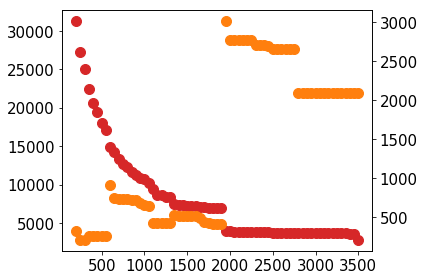

In [34]:
##Plot Number of links in the giant cluster, and in the second largest cluster (orange).
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step
a = []
b = []
c = []
Gc = max(nx.connected_component_subgraphs(Gc), key=len)
Gc.size()


##This the the percolation process.
for x in my_range(200,3500,50):
    for (u,v,w) in G.edges(data=True): 
        if w['weight'] < x:
            G.remove_edge(u,v)
    graphs2 =list(sorted(nx.connected_component_subgraphs(G),key=len, reverse=True))
    c.append(graphs2[1].size(weight=None))
    Gc = max(nx.connected_component_subgraphs(G), key=len)
    a.append(round(x,2))
    #b.append(Gc.order())
    b.append(Gc.size(weight=None))
    print(b)
 #####################DATA#########

# Create some mock data
fig, ax1 = plt.subplots()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
color = 'tab:red'
#ax1.set_xlabel('time (s)')
#ax1.set_ylabel('exp', color=color)

#ax1.plot(t, data1, color=color)
ax1.plot(a, b,'o', color=color, markersize=10)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:orange'
#ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1

plt.yticks(fontsize = 15)
ax2.plot(a,c,'o',color=color, markersize=10)
#x2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('./percolation_test.pdf', dpi = 300)
plt.show()


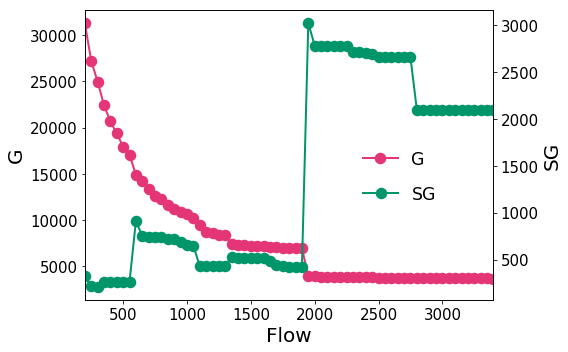

In [41]:
def scatterplot(x_dim, y_dim,z_dim):
   #f=plt.figure()
   x = x_dim
   y = y_dim
   z = z_dim 

   fig, ax = plt.subplots(figsize=(8, 5))
   colors = ['#2300A8', '#00A658']

   ax.set_xlabel('Flow',size=20)

   ax.set_ylabel('G',size=20)
   ax.plot(x,y,'o',linestyle='-',linewidth=2,color='#E43576',markersize=10,markeredgewidth=1.5,label='G')

   ax.legend(bbox_to_anchor=(0.37, 0.07, 0.5, 0.5),frameon=False, fontsize='xx-large')
   plt.xticks(fontsize = 15)
   plt.yticks(fontsize = 15)
   plt.xlim(200,3400)

   ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
   color = 'tab:orange'
   ax2.set_ylabel('SG',size=20)
   plt.yticks(fontsize = 15)
   ax2.plot(x,z,'o',linestyle='-',linewidth=2,color='#009669', markersize=10,markeredgewidth=1.5,label='SG')
   ax2.legend(bbox_to_anchor=(0.398, -0.05, 0.5, 0.5), frameon=False,fontsize='xx-large')

   fig.tight_layout()  # otherwise the right y-label is slightly clipped

   fig.savefig("t", bbox_inches='tight')
   plt.savefig('./percolation_old_verde.pdf', dpi = 300)
   plt.show()


scatterplot(a,b,c)